<a href="https://colab.research.google.com/github/sravani12-ui/Index.js/blob/main/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
.
5.Tune threshold and explain sigmoid function.
Interview Questions:
1.How does logistic regression differ from linear regression?
2.What is the sigmoid function?
3.What is precision vs recall?
4.What is the ROC-AUC curve?
5.What is the confusion matrix?
6.What happens if classes are imbalanced?
7.How do you choose the threshold?
8.Can logistic regression be used for multi-class problems?
Dataset: You can use any dataset relevant to the task, e.g., Breast Cancer Wisconsin Datas how to do this

Here is all the data you need:
"data.csv"

## Data loading

### Subtask:
Load the "data.csv" dataset.


**Reasoning**:
Load the data into a pandas DataFrame and display the first 5 rows.



In [1]:
import pandas as pd
df = pd.read_csv('data.csv')
display(df.head())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data exploration

### Subtask:
Explore the dataset, checking for class imbalance, missing values, data types, and descriptive statistics.


**Reasoning**:
Analyze the class imbalance, missing values, data types, and descriptive statistics of the dataset.



Class Distribution:
 diagnosis
B    357
M    212
Name: count, dtype: int64


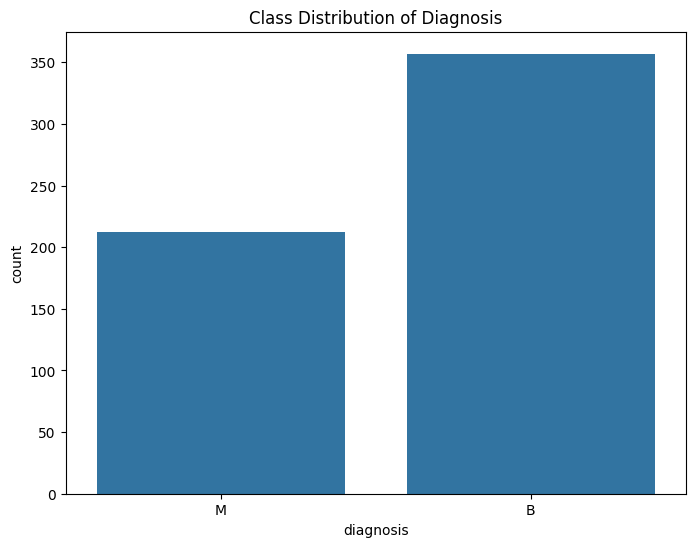


Missing Values:
                          Missing Values  Percentage
id                                    0         0.0
diagnosis                             0         0.0
radius_mean                           0         0.0
texture_mean                          0         0.0
perimeter_mean                        0         0.0
area_mean                             0         0.0
smoothness_mean                       0         0.0
compactness_mean                      0         0.0
concavity_mean                        0         0.0
concave points_mean                   0         0.0
symmetry_mean                         0         0.0
fractal_dimension_mean                0         0.0
radius_se                             0         0.0
texture_se                            0         0.0
perimeter_se                          0         0.0
area_se                               0         0.0
smoothness_se                         0         0.0
compactness_se                        0       

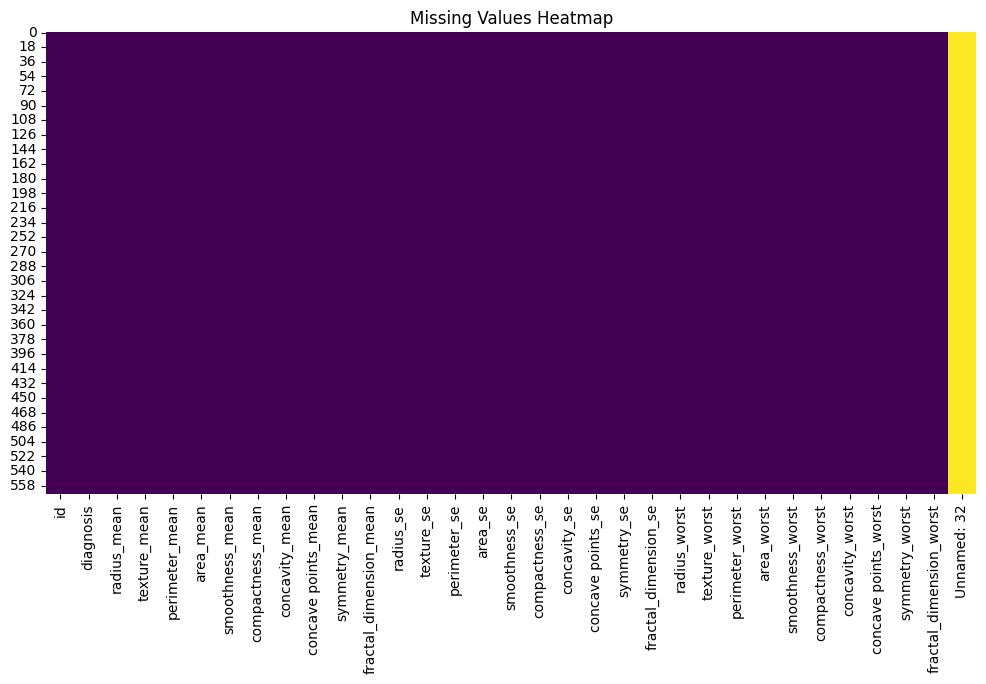


Data Types:
 id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concav

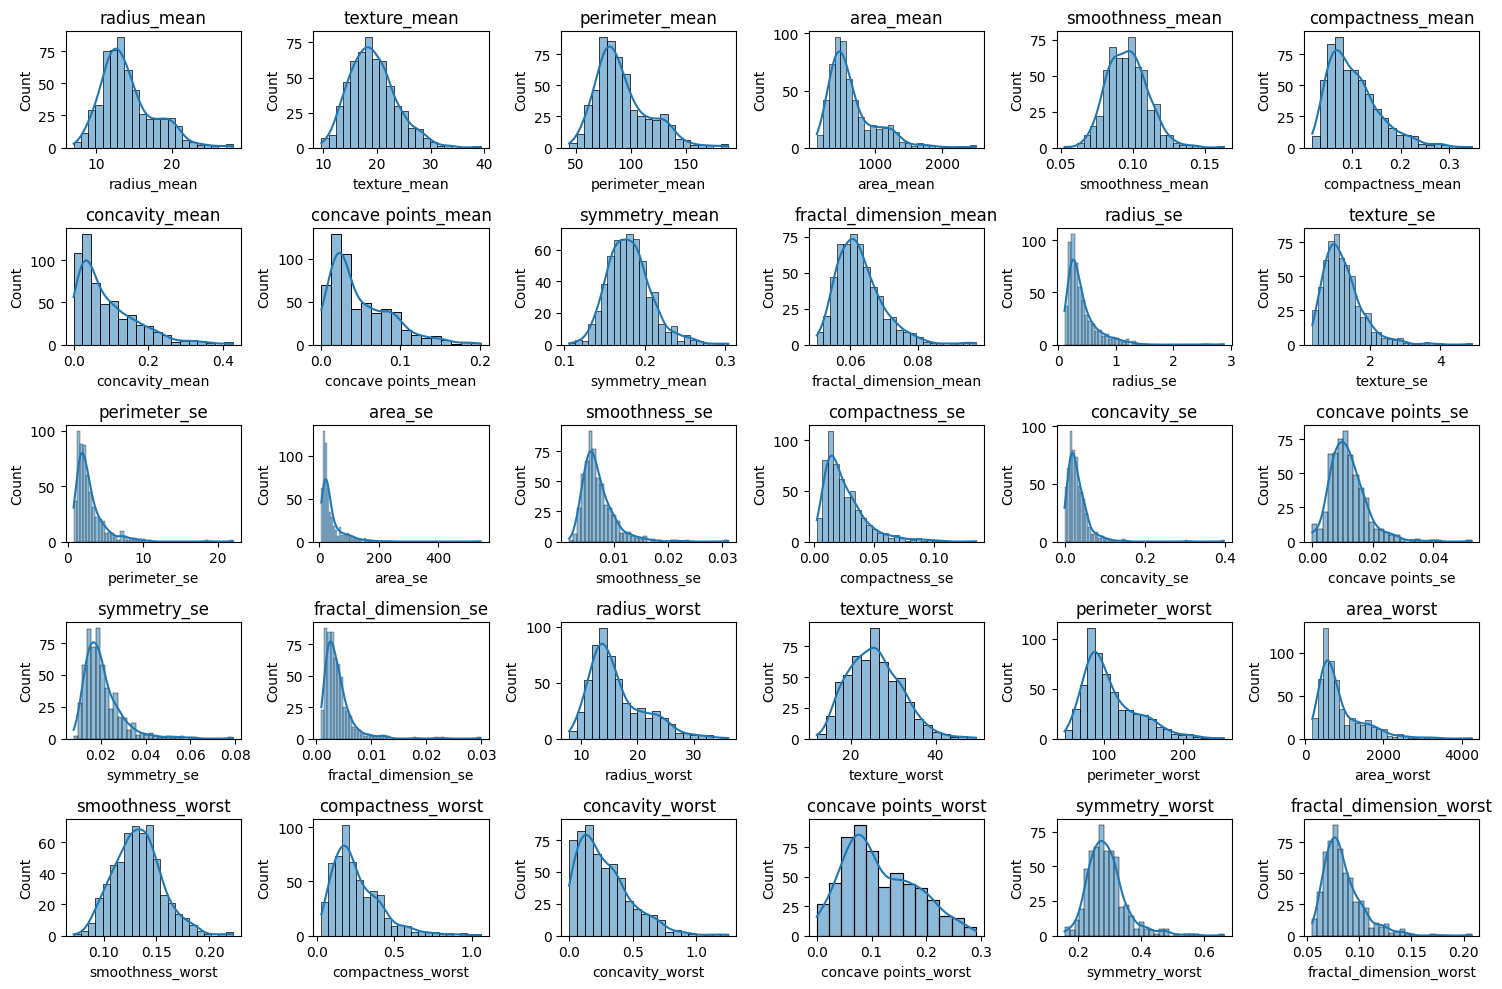

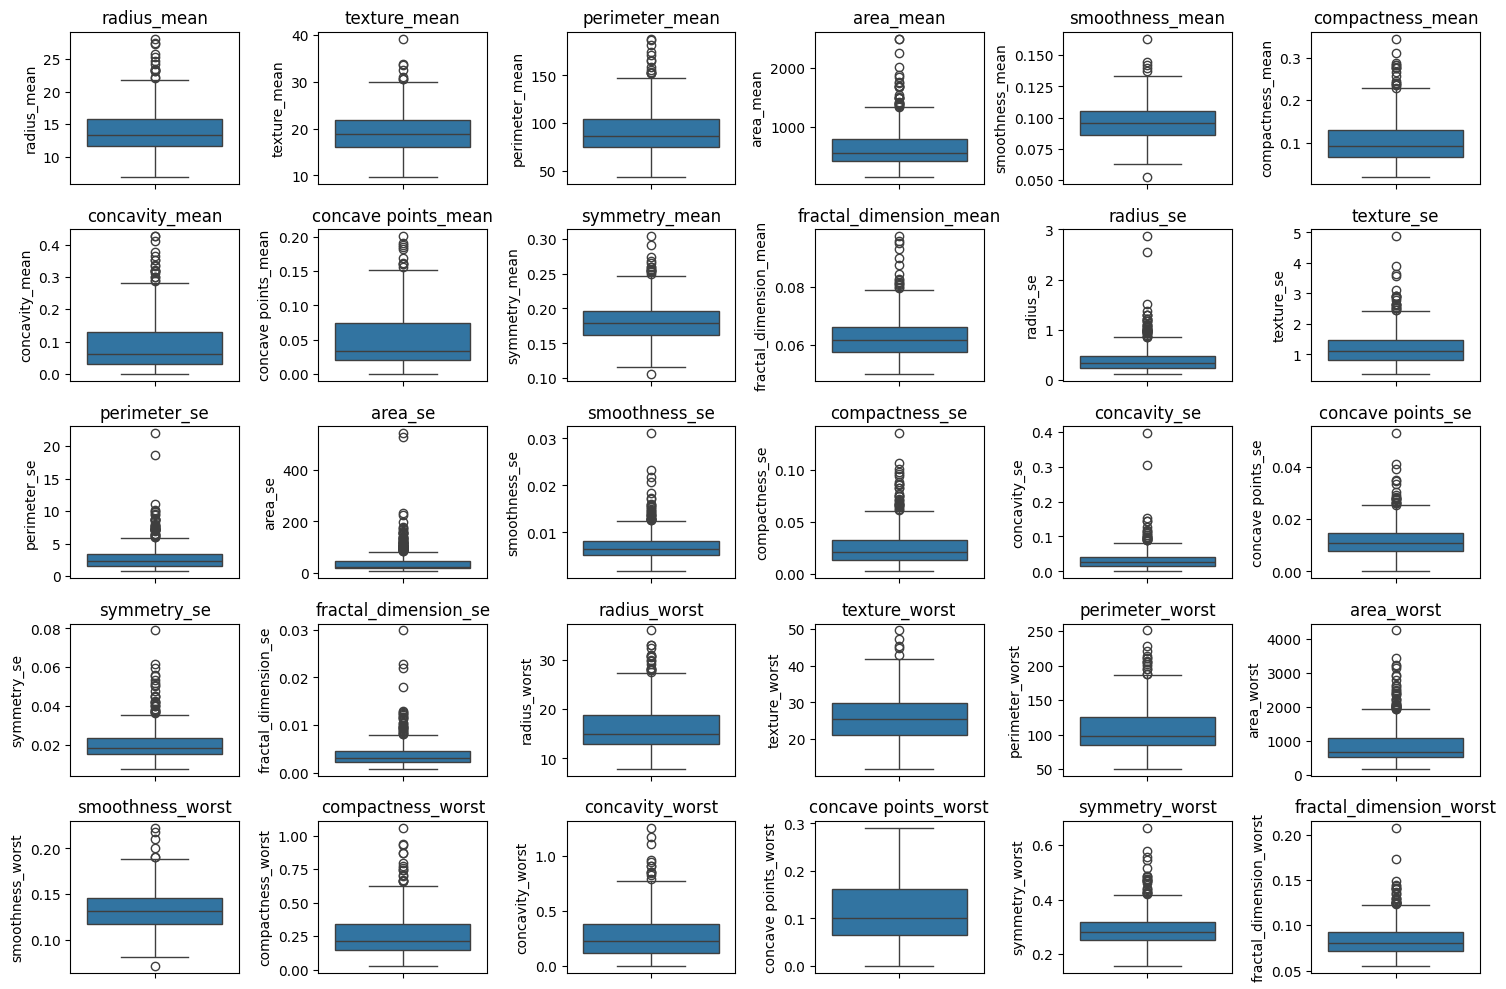

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Class Imbalance
diagnosis_counts = df['diagnosis'].value_counts()
print("Class Distribution:\n", diagnosis_counts)
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=df)
plt.title('Class Distribution of Diagnosis')
plt.show()


# Missing Values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print("\nMissing Values:\n", missing_df)

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Data Types
print("\nData Types:\n", df.dtypes)


# Descriptive Statistics
numerical_features = df.select_dtypes(include=['number'])
numerical_features = numerical_features.drop(columns=['id', 'Unnamed: 32']) # Drop 'id' and the all-NaN column
descriptive_stats = numerical_features.describe()
print("\nDescriptive Statistics:\n", descriptive_stats)

# Histograms for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features.columns):
  plt.subplot(5, 6, i+1)  # Adjust subplot grid as needed
  sns.histplot(df[col], kde=True)
  plt.title(col)
plt.tight_layout()
plt.show()

# Box plots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features.columns):
  plt.subplot(5, 6, i + 1)
  sns.boxplot(y=df[col])
  plt.title(col)
plt.tight_layout()
plt.show()

## Data preparation

### Subtask:
Prepare the data for model training.


**Reasoning**:
Drop the 'Unnamed: 32' column, convert the target variable 'diagnosis' to numerical labels, separate features and target, and scale the features using StandardScaler.



In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Drop the 'Unnamed: 32' column
df = df.drop(columns=['Unnamed: 32'])

# Convert the target variable 'diagnosis' into numerical labels
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})
y = df['diagnosis']

# Separate features (X) and target variable (y)
X = df.drop(columns=['id', 'diagnosis'])

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

## Data splitting

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using `train_test_split`, ensuring stratified sampling to maintain class distribution.



In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

## Model training

### Subtask:
Train a Logistic Regression model.


**Reasoning**:
Train a Logistic Regression model using the training data.



In [5]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(solver='liblinear', random_state=42)

# Train the model
logreg_model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

## Model evaluation

### Subtask:
Evaluate the trained logistic regression model.


**Reasoning**:
Evaluate the trained logistic regression model using the test set, calculate evaluation metrics, generate the confusion matrix and ROC curve, and explain the related concepts.



Accuracy: 0.9737
Precision: 0.9756
Recall: 0.9524
F1-score: 0.9639


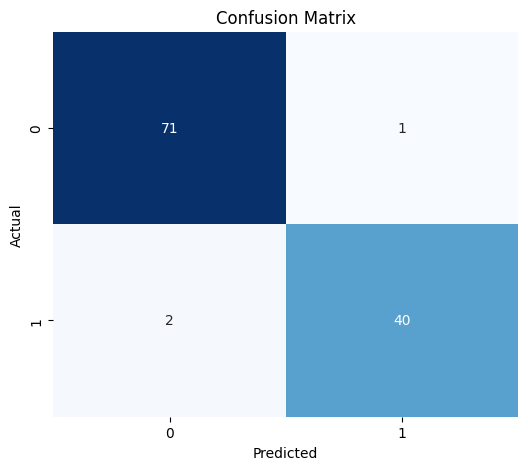

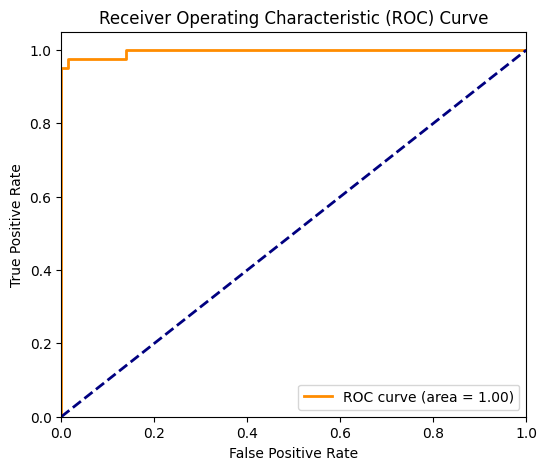

AUC: 0.9964


In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Predict probabilities and classes
y_pred_proba = logreg_model.predict_proba(X_test)[:, 1]
y_pred = logreg_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Generate and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Interview Question 5: What is the confusion matrix?
# The confusion matrix is a table that visualizes the performance of a classification model by showing the counts of true positives, true negatives, false positives, and false negatives. It's used to understand where the model is making errors (e.g., classifying malignant as benign or vice versa).

# Generate and plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
print(f"AUC: {roc_auc:.4f}")


# Interview Question 4: What is the ROC-AUC curve?
# The ROC curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.  AUC is the area under this curve.  A higher AUC signifies better model performance, with a perfect classifier having an AUC of 1. It provides a comprehensive measure of the model's ability to distinguish between classes across different thresholds.

# Interview Question 3: What is precision vs recall?
# Precision measures the proportion of correctly predicted positive observations out of all predicted positive observations.  Recall (or sensitivity) measures the proportion of correctly predicted positive observations out of all actual positive observations.  There's often a trade-off between the two; increasing precision might decrease recall, and vice versa.  The choice between them depends on the problem's specific requirements.

## Threshold tuning and sigmoid explanation

### Subtask:
Tune the classification threshold and explain the sigmoid function.


**Reasoning**:
Tune the classification threshold, calculate performance metrics, generate the confusion matrix and ROC curve for each threshold, and explain the sigmoid function and its role in logistic regression.



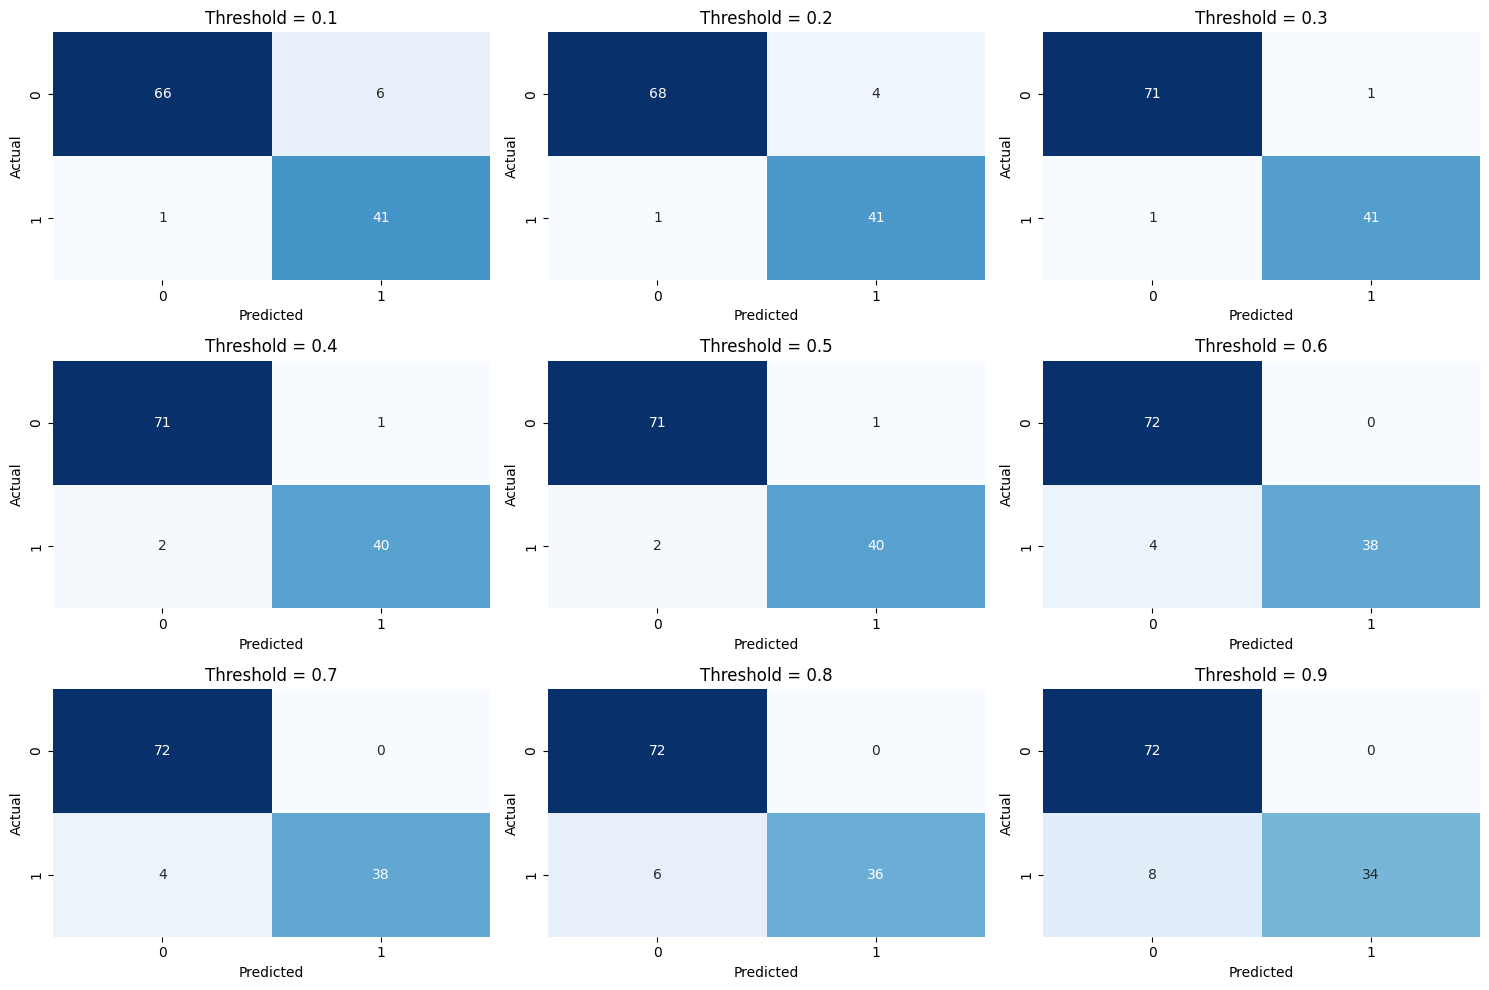

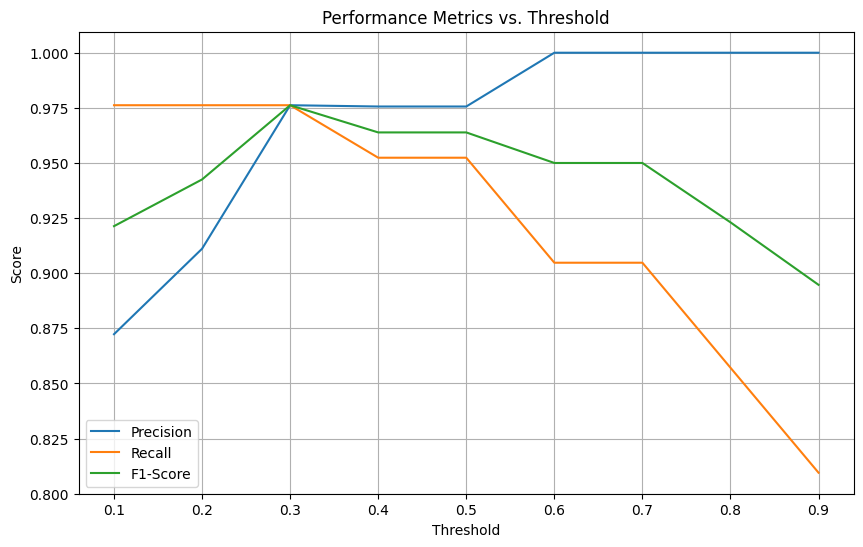

In [7]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Predict probabilities
y_pred_proba = logreg_model.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.1, 1.0, 0.1)
precision_scores = []
recall_scores = []
f1_scores = []
roc_aucs = []

plt.figure(figsize=(15, 10))

for i, threshold in enumerate(thresholds):
    y_pred = (y_pred_proba >= threshold).astype(int)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    roc_aucs.append(roc_auc)

    plt.subplot(3, 3, i + 1)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Threshold = {threshold:.1f}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()

plt.show()

plt.figure(figsize=(10,6))
plt.plot(thresholds, precision_scores, label='Precision')
plt.plot(thresholds, recall_scores, label='Recall')
plt.plot(thresholds, f1_scores, label='F1-Score')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title('Performance Metrics vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()


# Sigmoid Function Explanation (Interview Question 2)
# The sigmoid function, σ(z) = 1 / (1 + exp(-z)), is crucial in logistic regression.
# It maps the linear combination of input features (z = w1x1 + w2x2 + ... + wn*xn + b) to a probability between 0 and 1.
# In logistic regression, z represents the log-odds of the positive class.
# The sigmoid function transforms the log-odds into a probability.
# A probability above a chosen threshold classifies an instance as positive, and below the threshold as negative.

# Relationship between Sigmoid, Decision Boundary, and Threshold (Interview Question 7)
# The decision boundary is the point where the predicted probability equals the threshold.  Adjusting the threshold shifts this boundary.
# A lower threshold increases sensitivity (recall) but decreases specificity (precision).
# A higher threshold increases specificity but decreases sensitivity.
# The optimal threshold balances these metrics based on the problem's requirements.

# Optimal Threshold Selection based on threshold tuning experiment:
# Based on the plots above, choose a threshold that balances precision and recall according to the business problem.
# For example, if we prioritize minimizing false negatives (recall), we might choose a lower threshold.
# If we prioritize minimizing false positives (precision), we might choose a higher threshold.
# The choice depends on the specific use case.

## Address remaining interview questions

### Subtask:
Address the remaining interview questions.


**Reasoning**:
Address the remaining interview questions by providing textual answers.



In [8]:
# Interview Question 1: How does logistic regression differ from linear regression?
# Logistic regression and linear regression are both linear models, but they address different types of problems. Linear regression predicts a continuous outcome variable, while logistic regression predicts the probability of a categorical outcome (typically binary, but can be extended to multi-class).  Linear regression uses a linear equation to model the relationship between the independent and dependent variables, and the output is unbounded. Logistic regression uses a sigmoid function to constrain the output to a probability between 0 and 1, allowing for classification.  Linear regression assumes a linear relationship and normally distributed errors, whereas logistic regression assumes a logistic distribution of the error term.


# Interview Question 6: What happens if classes are imbalanced?
# Class imbalance occurs when one class significantly outnumbers others in a dataset.  This can lead to a model biased towards the majority class, resulting in poor performance on the minority class, even if overall accuracy appears high.  Metrics like precision and recall become crucial for evaluating performance on imbalanced datasets.  Accuracy can be misleading in these cases.

# Two techniques to mitigate class imbalance:

# 1. Oversampling the minority class:  Duplicate or generate synthetic samples from the minority class to balance the dataset.  SMOTE (Synthetic Minority Over-sampling Technique) is a popular method for creating synthetic samples.  Implementation: Use the `imblearn.over_sampling.SMOTE` class from the `imbalanced-learn` library.


# 2. Undersampling the majority class: Remove samples from the majority class to balance the dataset.  RandomUnderSampler is a simple approach.  Implementation: Use the `imblearn.under_sampling.RandomUnderSampler` class from the `imbalanced-learn` library.


# Interview Question 8: Can logistic regression be used for multi-class problems?
# Yes, logistic regression can be extended to handle multi-class classification.  Two common approaches are:

# 1. One-vs-Rest (OvR):  Train a separate binary logistic regression model for each class, treating it as the positive class and all other classes as the negative class.  For prediction, apply each model to the input and choose the class with the highest probability.

# 2. Multinomial Logistic Regression:  Models the probability of each class directly using a single model with a softmax function.  The model learns a weight vector for each class.  The output is a probability distribution over all classes.  The class with the highest probability is selected.  Multinomial logistic regression generally performs better than OvR, especially when classes are not well separated.

## Summary:

### Q&A

1.  **How does logistic regression differ from linear regression?**
    Linear regression predicts a continuous outcome, while logistic regression predicts the probability of a categorical outcome (typically binary). Linear regression uses a linear equation with an unbounded output, while logistic regression uses a sigmoid function to constrain the output between 0 and 1, enabling classification.
2.  **What is the sigmoid function?**
    The sigmoid function, $\sigma(z) = 1 / (1 + \text{exp}(-z))$, maps any real number input ($z$) to an output between 0 and 1. In logistic regression, it transforms the linear combination of features (log-odds) into a probability.
3.  **What is precision vs recall?**
    Precision is the proportion of correctly predicted positive observations out of all predicted positive observations (True Positives / (True Positives + False Positives)). Recall (or sensitivity) is the proportion of correctly predicted positive observations out of all actual positive observations (True Positives / (True Positives + False Negatives)). There is often a trade-off between precision and recall.
4.  **What is the ROC-AUC curve?**
    The Receiver Operating Characteristic (ROC) curve plots the True Positive Rate (Recall) against the False Positive Rate (1 - Specificity) at various classification thresholds. The Area Under the Curve (AUC) measures the overall ability of the model to distinguish between classes across all possible thresholds; a higher AUC indicates better performance.
5.  **What is the confusion matrix?**
    A confusion matrix is a table that summarizes the performance of a classification model by showing the counts of True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN). It helps visualize where the model is making errors.
6.  **What happens if classes are imbalanced?**
    Class imbalance can lead to a model that is biased towards the majority class, resulting in poor performance on the minority class. Overall accuracy can be misleading, making precision and recall more crucial evaluation metrics. Techniques like oversampling (e.g., SMOTE) or undersampling can mitigate class imbalance.
7.  **How do you choose the threshold?**
    The classification threshold is the probability value above which an instance is classified as positive. Choosing the threshold depends on the specific problem's requirements and the desired balance between precision and recall. A lower threshold increases recall but decreases precision, while a higher threshold increases precision but decreases recall. The optimal threshold is selected based on the trade-off that best suits the application.
8.  **Can logistic regression be used for multi-class problems?**
    Yes, logistic regression can be extended to multi-class classification using methods like One-vs-Rest (OvR), which trains a binary model for each class, or Multinomial Logistic Regression, which uses a single model with a softmax function to model the probability of each class directly.

### Data Analysis Key Findings

*   The dataset contains 569 entries with 33 columns, including an 'id', a 'diagnosis' (target variable), various numerical measurements, and an 'Unnamed: 32' column with 100% missing values.
*   The 'diagnosis' variable shows some class imbalance, with 357 benign (B) cases and 212 malignant (M) cases.
*   The 'Unnamed: 32' column was dropped due to having no data.
*   The 'diagnosis' variable was converted to numerical labels (0 for benign, 1 for malignant).
*   Numerical features were scaled using `StandardScaler`.
*   The data was split into training (80%) and testing (20%) sets using stratified sampling.
*   A Logistic Regression model was trained and evaluated.
*   The model achieved high performance metrics on the test set with a default threshold (0.5): Accuracy: 0.9737, Precision: 0.9756, Recall: 0.9524, F1-score: 0.9639, and AUC: 0.9964.
*   Analyzing confusion matrices and performance metrics across different thresholds (0.1 to 0.9) shows the trade-off between precision and recall as the threshold changes. Lowering the threshold generally increases recall and decreases precision, and vice versa.

### Insights or Next Steps

*   The logistic regression model performed very well on this dataset. Further tuning of hyperparameters might lead to minor improvements, but the current performance is already strong.
*   The choice of the optimal classification threshold should be guided by the specific costs associated with False Positives (misclassifying benign as malignant) and False Negatives (misclassifying malignant as benign) in a real-world medical context.
